In [1]:
import logging
import pathlib
import sys
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

In [2]:
sys.path.append('..')
from sbap.sdf import ChemblSdfReader
from sbap.featurizers.prolif_smina import ProlifSminaFeaturizer, DockingConfig

In [3]:
records = ChemblSdfReader().parse(pathlib.Path("ligand.sdf"))

In [4]:
config = DockingConfig(
    center_x=22.312222, center_y=23.862839, center_z=0.34194124, size_x=30, size_y=30, size_z=30, exhaustiveness=8, 
)
featurizer = ProlifSminaFeaturizer(config, logging.DEBUG)

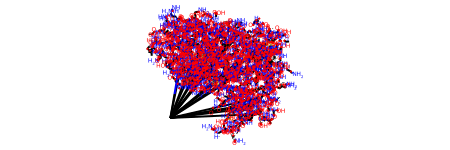

In [5]:
import rdkit.Chem

with open('4ivt.pdb', 'r') as f:
    protein = rdkit.Chem.MolFromPDBBlock(f.read())
    
protein

In [6]:
featurizer.transform(protein, records)

conda 23.1.0


1 molecule converted


   _______  _______ _________ _        _______ 
  (  ____ \(       )\__   __/( (    /|(  ___  )
  | (    \/| () () |   ) (   |  \  ( || (   ) |
  | (_____ | || || |   | |   |   \ | || (___) |
  (_____  )| |(_)| |   | |   | (\ \) ||  ___  |
        ) || |   | |   | |   | | \   || (   ) |
  /\____) || )   ( |___) (___| )  \  || )   ( |
  \_______)|/     \|\_______/|/    )_)|/     \|


smina is based off AutoDock Vina. Please cite appropriately.

Weights      Terms
-0.035579    gauss(o=0,_w=0.5,_c=8)
-0.005156    gauss(o=3,_w=2,_c=8)
0.840245     repulsion(o=0,_c=8)
-0.035069    hydrophobic(g=0.5,_b=1.5,_c=8)
-0.587439    non_dir_h_bond(g=-0.7,_b=0,_c=8)
1.923        num_tors_div

Using random seed: -704820951

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------


  0%|          | 0/1 [00:00<?, ?it/s]

Unknown interactions found in dataset: PHE108.A VdWContact, TRP115.A Hydrophobic, PHE108.A Hydrophobic, TYR71.A VdWContact, TYR71.A Hydrophobic, TYR71.A CationPi, TYR71.A PiStacking


(array([[1, 1, 1, 1, 1, 1, 1]]), array([100.]))